### Linear Regression(using Python)


Please note that all this code and material is  from 

Lectures in Quantitative Economics
Thomas J. Sargent John Stachurski

https://lectures.quantecon.org/py/ols.html

I am preserving here for recepies and for having a fozen/shapshot view.

In [1]:
import pandas as pd

df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s use a scatterplot to see whether any obvious relationship exists between GDP per capita and the protection against expropriation index



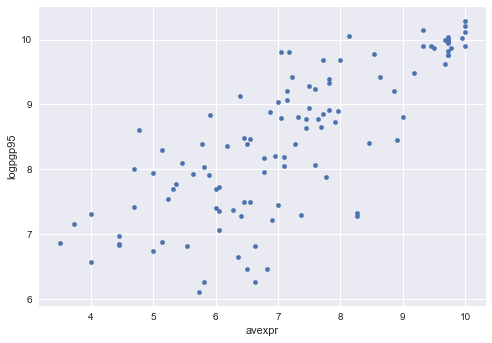

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita

Specifically, if higher protection against expropriation is a measure of institutional quality, then better institutions appear to be positively correlated with better economic outcomes (higher GDP per capita)

Given the plot, choosing a linear model to describe this relationship seems like a reasonable assumption

We can write our model as

$ logpgp95_i = \beta_0 + \beta_1 avexpr_i + u_i $

where:

- $\beta_0$ is the intercept of the linear trend line on the y-axis
- $\beta_1$ is the slope of the linear trend line, representing the marginal effect of protection against risk on log GDP per capita
- $u_i$ is a random error term (deviations of observations from the linear trend due to factors not included in the model)

[ 0.52210703  4.6603833 ]
7.79302547696
[  3.5          3.72727275   4.           4.4545455    4.68181801   5.
   5.13636351   5.22727251   5.31818199   5.36363649   5.5454545
   5.63636351   5.72727251   5.77272749   5.81818199   5.88636351
   5.909091     6.           6.0454545    6.18181801   6.27272749
   6.38636351   6.409091     6.4545455    6.5          6.5454545
   6.63636351   6.77272749   6.86363649   6.909091     6.9545455    7.
   7.0454545    7.090909     7.13636351   7.22727251   7.31818199
   7.4545455    7.5          7.590909     7.81818199   7.909091     7.9545455
   8.13636398   8.27272701   9.31818199   9.72727299  10.        ]


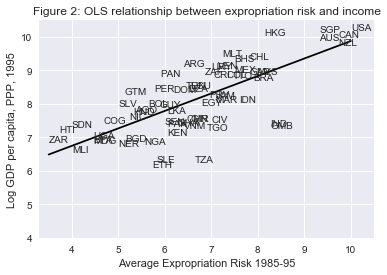

In [3]:
import numpy as np

# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

print(np.polyfit(X, y, 1))
print(np.poly1d(np.polyfit(X, y, 1))(6))
print(np.unique(X))
# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlim([3.3,10.5])
plt.ylim([4,10.5])
plt.xlabel('Average Expropriation Risk 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.title('Figure 2: OLS relationship between expropriation risk and income')
plt.show()

plt.show()

The most common technique to estimate the parameters ($\beta$‘s) of the linear model is Ordinary Least Squares (OLS)

As the name implies, an OLS model is solved by finding the parameters that minimize the sum of squared residuals, ie.


$\begin{equation*}
\begin{aligned}
& \underset{\hat{\beta}}{\text{min}}
& & \sum_{i=1}^{N} \hat{u}_{i}^{2} \\
\end{aligned}
\end{equation*}$


To estimate the constant term $\beta_0$, we need to add a column of 1’s to our dataset (consider the equation if $\beta_0$ was replaced with $\beta_0x_{i}$ and $x_i$=1)


In [4]:
df1['const'] = 1

Now we can construct our model in statsmodels using the OLS function

We will use pandas dataframes with statsmodels, however standard arrays can also be used as arguments

In [5]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=df1['logpgp95'], 
              exog=df1[['const', 'avexpr']], 
              missing='drop')
type(reg1)

/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels.regression.linear_model.OLS

So far we have simply constructed our model. We need to use .fit() to obtain parameter estimates $\hat{\beta_0}$ and $\hat{\beta_1}$

In [6]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

We now have the fitted regression model stored in results

To view the OLS regression results, we can call the .summary() method

Note that an observation was mistakenly dropped from the results in the original paper (see the note located in maketable2.do from Acemoglu’s webpage), and thus the coefficients differ slightly

In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 29 May 2018   Prob (F-statistic):           4.16e-24
Time:                        09:44:22   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

From our results, we see that

- The intercept $\hat{\beta}_0 =4.63$
- The slope $\hat{\beta}_1 = 0.53$
- The positive $\hat{\beta}_1$ parameter estimate implies that institutional quality has a positive effect on economic outcomes, as we saw in the figure
- The p-value of 0.000 for $\hat{\beta}_1$ implies that the effect of institutions on GDP is statistically significant (using p < 0.05 as a rejection rule)
- The R-squared value of 0.611 indicates that around 61% of variation in log GDP per capita is explained by protection against expropriation
- Using our parameter estimates, we can now write our estimated relationship as

$\hat{logpgp95_i}=4.63+0.53 avexpr_i$

This equation describes the line that best fits our data, as shown in Figure 2

We can use this equation to predict the level of log GDP per capita for a value of the index of expropriation protection

For example, for a country with an index value of 7.07 (the average for the dataset), we find that their predicted level of log GDP per capita in 1995 is 8.38



In [8]:
mean_expr = np.mean(df1_subset['avexpr'])
print(mean_expr)
predicted_logpdp95 = 4.63 + 0.53 * 7.07
print(predicted_logpdp95)

6.515625
8.3771


An easier (and more accurate) way to obtain this result is to use .predict() and set constant=1 and avexpri=mean_expr

In [9]:
print(results.predict(exog=[[1, mean_expr], [1,7.0]]))
print(results.predict(exog=[1,7.0]))


[ 8.09156367  8.34918885]
[ 8.34918885]


We can obtain an array of predicted logpgp95i for every value of avexpri in our dataset by calling .predict() on our results

Plotting the predicted values against avexpri shows that the predicted values lie along the linear line that we fitted above

The observed values of logpgp95i are also plotted for comparison purposes

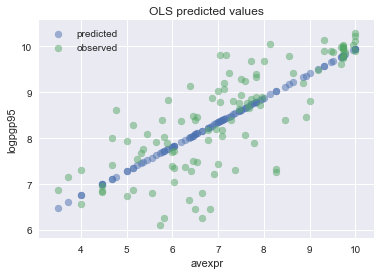

In [10]:
# Drop missing observations from whole sample

df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

# Plot predicted values

plt.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5, label='predicted')

# Plot observed values

plt.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('avexpr')
plt.ylabel('logpgp95')
plt.show()

### Extending the Linear Regression Model¶


So far we have only accounted for institutions affecting economic performance - almost certainly there are numerous other factors affecting GDP that are not included in our model

Leaving out variables that affect logpgp95i will result in omitted variable bias, yielding biased and inconsistent parameter estimates

We can extend our bivariate regression model to a multivariate regression model by adding in other factors that may affect logpgp95i

[AJR01] consider other factors such as:

the effect of climate on economic outcomes; latitude is used to proxy this
differences that affect both economic performance and institutions, eg. cultural, historical, etc.; controlled for with the use of continent dummies
Let’s estimate some of the extended models considered in the paper (Table 2) using data from maketable2.dta


In [11]:
df2 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable2.dta')


In [12]:
df2.head()

,shortnam,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco
0,AFG,0.0,0.366667,NaN,NaN,0.0,1.0,NaN,NaN
1,AGO,1.0,0.136667,5.363636,7.770645,0.0,0.0,-3.411248,1.0
2,ARE,0.0,0.266667,7.181818,9.804219,0.0,1.0,NaN,NaN
3,ARG,0.0,0.377778,6.386364,9.133459,0.0,0.0,-0.872274,1.0
4,ARM,0.0,0.444444,NaN,7.682482,0.0,1.0,NaN,NaN


In [13]:
# Add constant term to dataset
df2['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'avexpr']
X2 = ['const', 'avexpr', 'lat_abst']
X3 = ['const', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df2['logpgp95'], df2[X1], missing='drop').fit()
reg2 = sm.OLS(df2['logpgp95'], df2[X2], missing='drop').fit()
reg3 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit()

Now that we have fitted our model, we will use summary_col to display the results in a single table (model numbers correspond to those in the paper)

In [20]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: "{x.rsquared:0.2f}",'No. observations' : lambda x: "{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

SyntaxError: invalid syntax (<ipython-input-20-02a1d4447b23>, line 3)

### Endogeneity


As [AJR01] discuss, the OLS models likely suffer from **endogeneity** issues, resulting in biased and inconsistent model estimates

Namely, there is likely a two-way relationship between institutions and economic outcomes:

- richer countries may be able to afford or prefer better institutions
- variables that affect income may also be correlated with institutional differences
- the construction of the index may be biased; analysts may be biased towards seeing countries with higher income having better institutions

To deal with endogeneity, we can use two-stage least squares (2SLS) regression, which is an extension of OLS regression

This method requires replacing the endogenous variable $avexpr_i$ with a variable that is:

1. correlated with $avexpr_i$
2. not correlated with the error term (ie. it should not directly affect the dependent variable, otherwise it would be correlated with $u_i$ due to omitted variable bias)

The new set of regressors is called an **instrument**, which aims to remove endogeneity in our proxy of institutional differences

The main contribution of [AJR01] is the use of settler mortality rates to instrument for institutional differences

They hypothesize that higher mortality rates of colonizers led to the establishment of institutions that were more extractive in nature (less protection against expropriation), and these institutions still persist today

Using a scatterplot (Figure 3 in [AJR01]), we can see protection against expropriation is negatively correlated with settler mortality rates, coinciding with the authors’ hypothesis and satisfying the first condition of a valid instrument

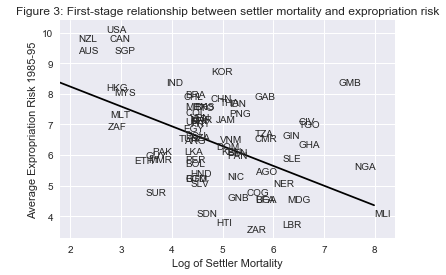

In [21]:
# Dropping NA's is required to use numpy's polyfit
df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])

X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlim([1.8,8.4])
plt.ylim([3.3,10.4])
plt.xlabel('Log of Settler Mortality')
plt.ylabel('Average Expropriation Risk 1985-95')
plt.title('Figure 3: First-stage relationship between settler mortality and expropriation risk')
plt.show()

The second condition may not be satisfied if settler mortality rates in the 17th to 19th centuries have a direct effect on current GDP (in addition to their indirect effect through institutions)

For example, settler mortality rates may be related to the current disease environment in a country, which could affect current economic performance

[AJR01] argue this is unlikely because:
    
- The majority of settler deaths were due to malaria and yellow fever, and had limited effect on local people
- The disease burden on local people in Africa or India, for example, did not appear to be higher than average, supported by relatively high population densities in these areas before colonization.

As we appear to have a valid instrument, we can use 2SLS regression to obtain consistent and unbiased parameter estimates

#### First stage

The first stage involves regressing the endogenous variable (avexpri) on the instrument

The instrument is the set of all exogenous variables in our model (and not just the variable we have replaced)

Using model 1 as an example, our instrument is simply a constant and settler mortality rates logem4i

Therefore, we will estimate the first-stage regression as

$avexpr_i=\delta_0 + \delta_1  logem4_i + v_i $

The data we need to estimate this equation is located in maketable4.dta (only complete data, indicated by baseco = 1, is used for estimation)

In [22]:
# Import and select the data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')
df4 = df4[df4['baseco'] == 1]

# Add a constant variable
df4['const'] = 1

# Fit the first stage regression and print summary
results_fs = sm.OLS(df4['avexpr'],
                    df4[['const', 'logem4']],
                    missing='drop').fit()
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.08e-05
Time:                        10:37:45   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.0

### Second stage

We need to retrieve the predicted values of $avexpr_i$ using .predict()

We then replace the endogenous variable $avexpr_i$ with the predicted values $\hat{avexpr_i}$ in the original linear model

Our second stage regression is thus

$logpgp95_i=\beta_0 + \beta_1 \hat{avexpr_i} + u_i$

In [23]:
df4['predicted_avexpr'] = results_fs.predict()

results_ss = sm.OLS(df4['logpgp95'],
                    df4[['const', 'predicted_avexpr']]).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Tue, 29 May 2018   Prob (F-statistic):           2.66e-10
Time:                        10:41:42   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823  

The second-stage regression results give us an unbiased and consistent estimate of the effect of institutions on economic outcomes

The result suggests a stronger positive relationship than what the OLS results indicated

Note that while our parameter estimates are correct, our standard errors are not and for this reason, computing 2SLS ‘manually’ (in stages with OLS) is not recommended

We can correctly estimate a 2SLS regression in one step using the **linearmodels** package, an extension of statsmodels

To install this package, you will need to run pip install linearmodels in your command line



In [25]:
from linearmodels.iv import IV2SLS

In [26]:
iv = IV2SLS(dependent=df4['logpgp95'],
            exog=df4['const'],
            endog=df4['avexpr'],
            instruments=df4['logem4']).fit(cov_type='unadjusted')

print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               logpgp95   R-squared:                      0.1870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1739
No. Observations:                  64   F-statistic:                    37.568
Date:                Tue, May 29 2018   P-value (F-stat)                0.0000
Time:                        10:53:27   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.9097     1.0106     1.8897     0.0588     -0.0710      3.8903
avexpr         0.9443     0.1541     6.1293     0.00


Given that we now have consistent and unbiased estimates, we can infer from the model we have estimated that institutional differences (stemming from institutions set up during colonization) can help to explain differences in income levels across countries today

[AJR01] use a marginal effect of 0.94 to calculate that the difference in the index between Chile and Nigeria (ie. institutional quality) implies up to a 7-fold difference in income, emphasizing the significance of institutions in economic development